In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from scipy.stats import uniform, randint
from xgboost import XGBRegressor
from paramFunctions import *
import warnings

warnings.filterwarnings("ignore")

In [2]:
df_Diamonds = pd.read_csv("../data/Diamonds_Price.csv")

X_diamonds = df_Diamonds.drop(columns=["price"], axis=1)
Y_diamonds = df_Diamonds['price']

X_diamonds_train, X_diamonds_test, y_diamonds_train, y_diamonds_test = train_test_split(X_diamonds, Y_diamonds, test_size=0.3, random_state=42)

In [3]:
si_cat=SimpleImputer(strategy="constant", fill_value='NO INFORMATION')
si_num = SimpleImputer(strategy='median')
scaler=MinMaxScaler()

numerical_pipeline = Pipeline(steps=[
    ('imputer', si_num),
    ('scaler', scaler)
    ])
    
category_pipeline = Pipeline(steps=[
    ('imputer', si_cat),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ])

col_transformer = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, make_column_selector(dtype_include=np.number)),
    ('cat', category_pipeline, make_column_selector(dtype_include='object'))
    ],
    remainder='drop',
    n_jobs=-1)  

In [4]:
RF_regressor = Pipeline([('preprocessor', col_transformer),
                         ('model', RandomForestRegressor())])
ElasticNet_regressor = Pipeline([('preprocessor', col_transformer),
                                 ('model', ElasticNet())])    
XGB_regressor = Pipeline([('preprocessor', col_transformer),
                          ('model', XGBRegressor())])  

In [5]:
param_distribution_rf = {
    'model__n_estimators': randint(1,500),
    'model__min_samples_split': randint(2, 10),
    'model__min_samples_leaf': randint(2, 10)
}

param_distributions_enet = {
    'model__alpha': uniform(0, 1),
    'model__l1_ratio': uniform(0, 1),
}

param_distributions_xgb = {
    'model__min_child_weight': [2 ** uniform.rvs(0, 7) for _ in range(100)],
    'model__max_depth': randint(1, 15),
    'model__colsample_bytree': uniform(0, 1)
}

In [6]:
param_list_enet, score_list_enet = get_param_score_list(X_diamonds_train,y_diamonds_train,X_diamonds_test, y_diamonds_test, ElasticNet_regressor, param_distributions_enet, 160)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 70 candidates, totalling 350 fits
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 110 candidates, totalling 550 fits
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Fitting 5 fold

In [7]:
param_list_xgb, score_list_xgb = get_param_score_list(X_diamonds_train,y_diamonds_train,X_diamonds_test, y_diamonds_test, XGB_regressor, param_distributions_xgb, 160)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 70 candidates, totalling 350 fits
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 110 candidates, totalling 550 fits
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Fitting 5 fold

In [6]:
param_list_rf, score_list_rf = get_param_score_list(X_diamonds_train,y_diamonds_train,X_diamonds_test, y_diamonds_test, RF_regressor, param_distribution_rf, 160)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 70 candidates, totalling 350 fits
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Fitting 5 folds for each of 90 candidates, totalling 450 fits
[{'model__min_samples_leaf': 8, 'model__min_samples_split': 5, 'model__n_estimators': 349}, {'model__min_samples_leaf': 3, 'model__min_samples_split': 4, 'model__n_estimators': 215}, {'model__min_samples

In [12]:
list_1 = list(range(2, 12, 2))  
list_2 = list(range(20, 151, 10))  

iter_number = list_1 + list_2

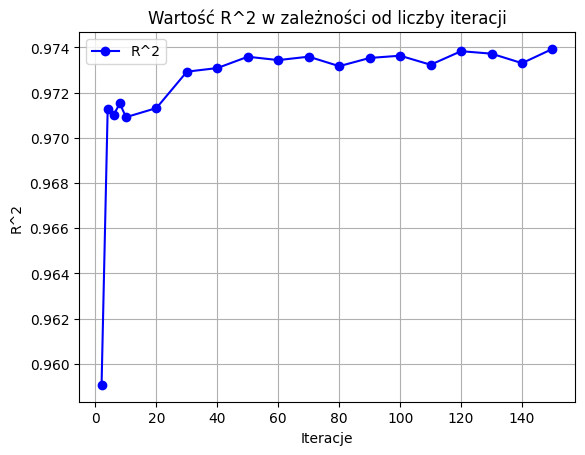

In [41]:
r2_iteration_plot(iter_number, score_list_rf,'diamonds', 'rf')

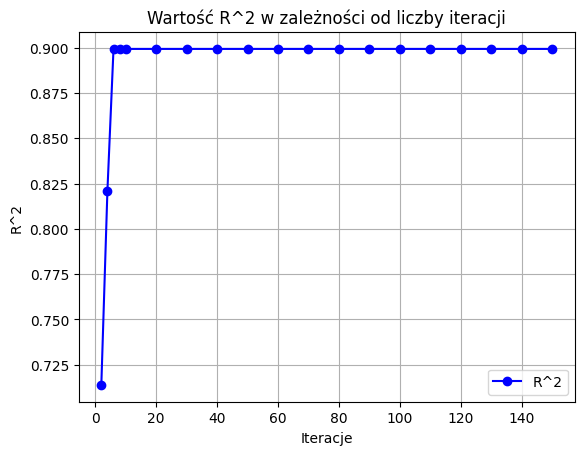

In [19]:
r2_iteration_plot(iter_number, score_list_enet,'diamonds', 'enet')

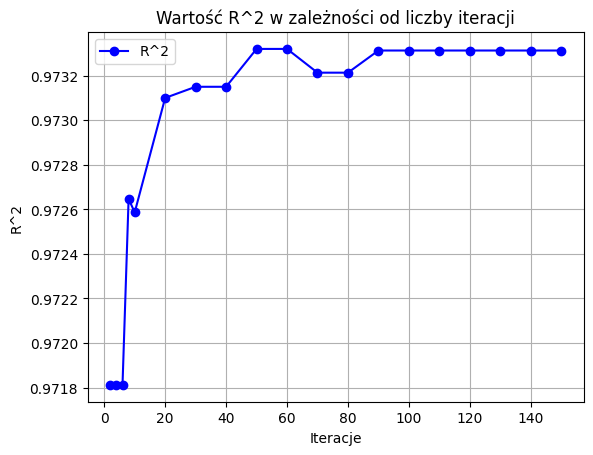

In [18]:
r2_iteration_plot(iter_number, score_list_xgb,'diamonds', 'xgb')

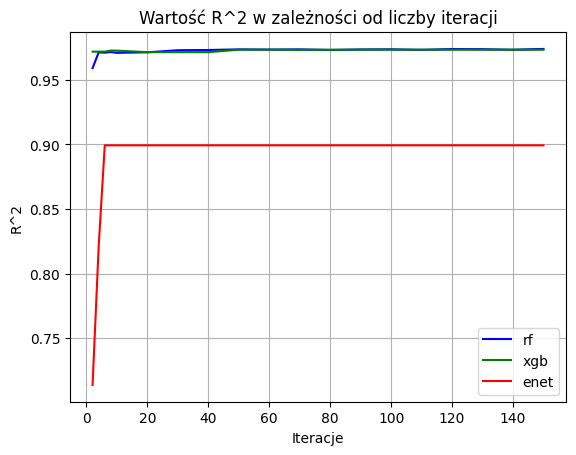

In [44]:
r2_all_models(iter_number, score_list_rf,score_list_xgb, score_list_enet, 'diamonds')